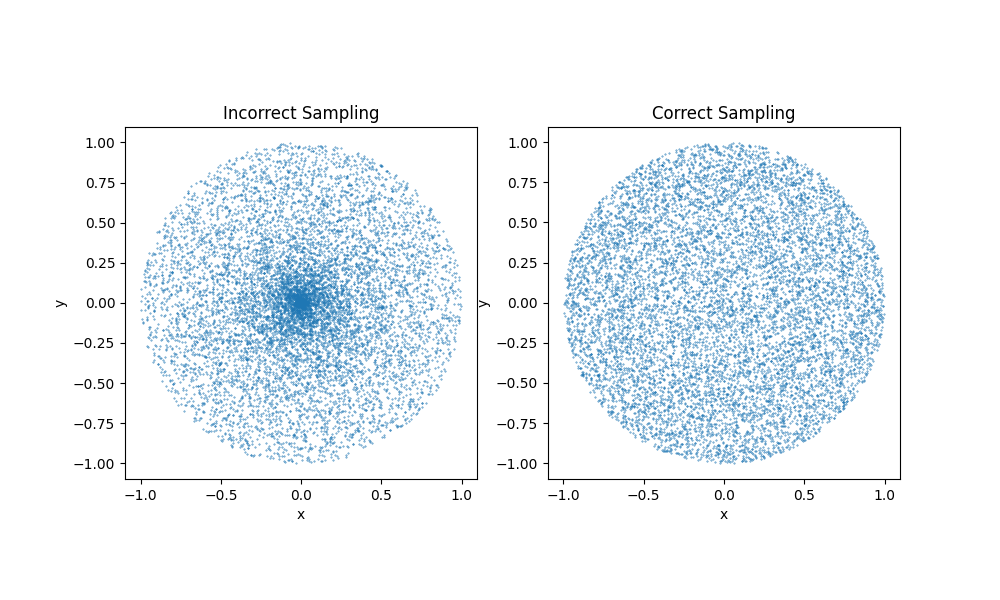

In [1]:
"""surface_sampling_circle.py"""
# Cell 1

from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np
import numpy.random as random
from matplotlib.markers import MarkerStyle

if typing.TYPE_CHECKING:
    from matplotlib.axes import Axes
    from numpy.typing import NDArray

%matplotlib widget


def plot_incorrect(ax: Axes) -> None:
    num_samples = 10000

    v: NDArray[np.float_] = np.linspace(0, 2 * np.pi, num_samples)  # toroidal angle
    r: NDArray[np.float_] = random.rand(num_samples)

    x: NDArray[np.float_] = r * np.cos(v)
    y: NDArray[np.float_] = r * np.sin(v)

    pixel_size: float = (72 / ax.figure.dpi) ** 2  # type: ignore
    ax.scatter(x, y, marker=MarkerStyle("."), s=pixel_size)

    ax.set_title("Incorrect Sampling")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    ax.set_aspect("equal")


def plot_correct(ax: Axes) -> None:
    num_samples = 10000

    v: NDArray[np.float_] = np.linspace(0, 2 * np.pi, num_samples)  # toroidal angle
    r: NDArray[np.float_] = random.rand(num_samples)

    # Changed r * np.sin(v) or np.cos(v) to np.sqrt(r) * np.sin(v) or np.cos(v)
    # This works because the sqrt of the random samples creates a more uniform 
    # distribution of numbers in the random sample.
    x: NDArray[np.float_] = np.sqrt(r) * np.cos(v)
    y: NDArray[np.float_] = np.sqrt(r) * np.sin(v)

    pixel_size: float = (72 / ax.figure.dpi) ** 2  # type: ignore
    ax.scatter(x, y, marker=MarkerStyle("."), s=pixel_size)

    ax.set_title("Correct Sampling")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    ax.set_aspect("equal")


def main() -> None:
    plt.figure(" ", figsize=(10, 6))
    plot_incorrect(plt.subplot(121))
    plot_correct(plt.subplot(122))
    plt.show()


main()